# Title: Taxi rides analysis
### Author: Xia Cui 

### Introduction 

This short report draws on the Chicago weather data in November 2017 from the website, and information from a database on taxi rides in Chicago. The exploratory analysis of the data and hypothesis testing are intended to understand passenger preferences and the impact of external factors on rides. 

The web data has already been retrieved and preprocessed in previous tasks. The database information from its three tables has also been preprocessed. The result of the preprocessing are three datasets: 
- a dataset that contains information of the taxi company name and the number of rides each company has November 15-16, 2017;  
- a dataset that contains information on Chicago neighborhoods where rides ended, and the average number of rides that ended in each neighborhood in November 2017; and 
- a dataseton contains information on the rides from the Loop to O'Hare International Airport. 

In what follows, we will first import the datasets, take a look at their shape, check on the datatypes in each and whether the dataset is complete. Then an exploratory analysis will be conducted to show the distribution of the number of rides among the taxi companies, and the top 10 neighbourhoods for average dropoffs. Finally, we will carry out a hypothesis test to see if the average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays. 

### Table of content 
#### [Part 1: Data importing](#importing)  
#### [Part 2: Exploratory data analysis](#eda)  
#### [Part 3: Hypothesis testing](#test)  
#### [Part 4: Findings and conclusions](#conclusion)  

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

### Part 1: Data importing

<a id="importing"></a>

First let's import the three datasets. 

In [2]:
taxi = pd.read_csv(
    'https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_01.csv')
trips = pd.read_csv(
    'https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv')

In [3]:
rides_loop_ohare = pd.read_csv(
    'https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv')

Next, let's take a look at their shape and data types. 

In [4]:
taxi.shape

(64, 2)

In [5]:
trips.shape

(94, 2)

In [6]:
rides_loop_ohare.shape

(1068, 3)

In [7]:
taxi.dtypes

company_name    object
trips_amount     int64
dtype: object

In [8]:
trips.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

In [9]:
rides_loop_ohare.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

All look good, except the 'start_ts' in the 3rd dataset likely should be datetime data type. Before we fix that, let's also take a look at the first few rows of the data. 

In [10]:
taxi.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [11]:
trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [12]:
rides_loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Now let's change the datatype of the 'start_ts' column. 

In [13]:
rides_loop_ohare['start_ts'] = pd.to_datetime(rides_loop_ohare['start_ts'])

In [14]:
rides_loop_ohare.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object

Although the datasets are results of previous tasks and should be okay, just to be sure, let's check whether they have null values too. 

In [15]:
taxi.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [16]:
trips.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [17]:
rides_loop_ohare.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

No null values found. Now the datasets are ready for the exploratory analysis next. 

### Part 2: Exploratory data analysis

<a id="eda"></a>

In this section, we'll make two graphs, showing the distribution of the number of rides among taxi companies, and the top 10 neighbourhoods by the number of dropoffs in these areas. 

**Distribution of taxi rides**

In [18]:
len(taxi['company_name'].unique())

64

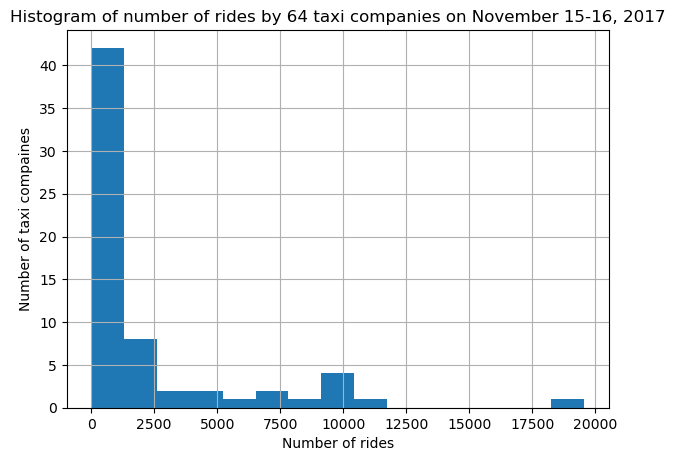

In [19]:
taxi.hist('trips_amount', bins = 15)
plt.title('Histogram of number of rides by 64 taxi companies on November 15-16, 2017')
plt.ylabel('Number of taxi compaines')
plt.xlabel('Number of rides')
plt.show()

In [20]:
taxi['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

In [21]:
taxi.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


The histogram and summary statistics above shows that the number of rides for over 75% of the taxi companies is under 2500 on 15-16 November 2017. An apparent outlier is Flash Cab, topping the list with 19558 rides, followed by 5 companies with the number of rides around 10000. 

**Top 10 neighbourhoods for dropoffs**

Let's show the information with a horizontal bar chart. 

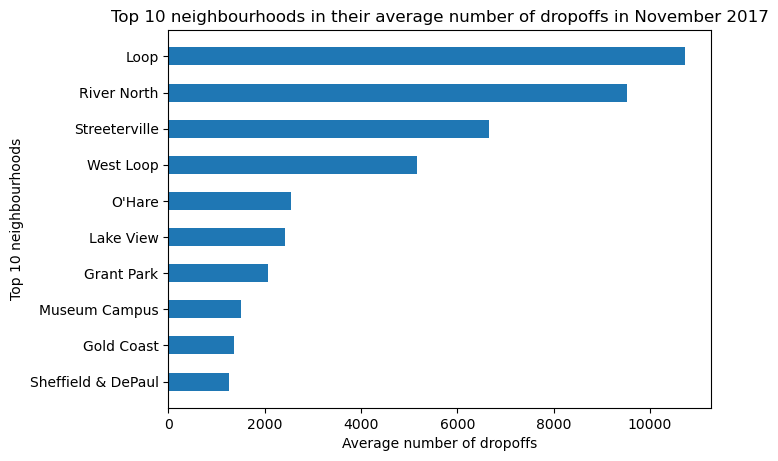

In [22]:
plt.barh(trips.head(10)['dropoff_location_name'],
         trips.head(10)['average_trips'], height=0.5)
plt.xlabel('Average number of dropoffs')
plt.ylabel('Top 10 neighbourhoods')
plt.title(
    'Top 10 neighbourhoods in their average number of dropoffs in November 2017')
plt.gca().invert_yaxis()
plt.show()

In [23]:
trips.head(10)['average_trips'].sum()/trips['average_trips'].sum()

0.7669007507076712

The above bar chart shows the 10 neighbourhoods that have the highest average number of dropoffs in November 2017. Those 10 areas together account for over 75% of the total dropoffs. 

### Part 2 summary

The exploratory analysis in this section shows that while majority of the taxi companies have their number of rides over the two days in November 2017 under 2500, there are some companies who did exceptionally well in this aspect. 

Both information is valuable. Knowing the typical number and the spread of rides give some idea about what the market demand is like. Although beyond the scope of this report, it might also be worthwhile for Zuber to examine the data further for those high performing companies and find out what make them successful. Is it the service? The car type? The response time? The price? 

We also found out that the 10 neighbourhoods having the highest average number of dropoffs in November account for over 75% of the total dropoffs. This is very valueable information. What are those neighbourhoods? Are they residential areas whose residents are frequent cab riders? or popular recreational areas where people frequent? Either way, those are probably areas Zuber will need to have a higher concentration of cars available. 

Next, let's take a look at how weather affect the duration of rides using a particular route. 

### Part 3: Hypothesis testing

<a id="test"></a>

In this section, we will test one hypothesis: 

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

The null hypothesis is: the average duration for riders of this route is the same for rainy Saturdays and non rainy Saturdays. 

The alternative hypothesis is the average duration for riders of this route on rainy Saturdays is different from non rainy Saturdays.

The significance level (alpha) will be 0.05, following the most common practice. If the test result is lower than 0.05, then we reject the null hypothesis. Otherwise, we can't reject the null hypothesis. 

First, let's separate the datasets based on 'weather_conditions'. Previously when we worked on the SQL database, we grouped those with weather descriptions containing 'rain' or 'storm' into the category of 'Bad' weather_conditions, and the rest 'Good' weather_conditions. We also only included all Saturdays in November in this dataset. 

Therefore here 'Good' indicates non rainy Saturdays, and 'Bad' rainy Saturdays. 

Let's also check whether there are any unusual values in 'duration_seconds', such as 0. 

In [24]:
rides_loop_ohare['duration_seconds'].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [25]:
rides_loop_ohare.query('duration_seconds == 0')

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


There are 5 records of 0 duration, which all happen to 'Good' weather_conditions. It's not clear what these are. They could be cancelled trips, or errors in data entry. Since these 0's will skew the average duration for non rainy days, we will not include these in the hypothesis test. 

In [26]:
duration_no_rain = rides_loop_ohare[(rides_loop_ohare['weather_conditions']
                                     == 'Good') &
                                    (rides_loop_ohare['duration_seconds']
                                     != 0)]['duration_seconds']

duration_rain = rides_loop_ohare[rides_loop_ohare['weather_conditions']
                                 == 'Bad']['duration_seconds']

In [27]:
duration_no_rain.describe()

count     882.000000
mean     2013.278912
std       743.565217
min        60.000000
25%      1397.250000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [28]:
duration_rain.describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

Before we perform the t test to compare the average of the duration between rainy and non rainy Saturdays, we need to find out if they are from a normal distribution.

In [29]:
st.shapiro(duration_rain)

ShapiroResult(statistic=0.9762433767318726, pvalue=0.0036118649877607822)

In [30]:
st.shapiro(duration_no_rain)

ShapiroResult(statistic=0.8949944376945496, pvalue=4.658177891397572e-24)

Both have pvalue a lot smaller than 0.05, which indicates that the values are not from a normal distribution. Therefore, to find out if the two sets of durations have similar variance, we will use the Levene test.

In [31]:
st.levene(duration_rain, duration_no_rain, center = 'mean')

LeveneResult(statistic=0.424296319156277, pvalue=0.5149422013161751)

Pvalue from the Levene test is larger than 0.05, which indicates that we can't reject the null hypothesis that their variances are the same. 

We will set the equal_var as True for the t test below.

In [32]:
st.ttest_ind(duration_rain, duration_no_rain, equal_var=True).pvalue

1.3318772977743245e-11

Pvalue from the T test is smaller than our significance threshold value, 0.05, therefore we reject the null hypothesis, and conclude that the average duration of trips on rainy saturdays and non rainy saturdays from Loop to O'Hare are different. 

### Part 3 summary 

One possible factor for the different average ride durations between rainy and non rainy Saturdays is traffic condition. What does this conclusion mean to Zuber? 

Most riding share apps provide the cost of the trip to customers when they order the service. Given the different duarion in different weather conditions, it might be necessary for Zuber to have different pricing mechanism in place when generating the cost of the trips so that the difference in duration is taken into account. 

### Part 4: Findings and conclusions 

<a id="conclusion"></a>

To conclude, in this report, we examined three datasets generated from the previous preprocessing of both website data on weather and SQL database data on taxi rides. 

The exploratory analysis of the data shows the ditribution of the number of rides over two days in November for 64 taxi companies. It identified that majority of the taxi companies had under 2500 trips, whereas some top performing companies managed to have had over 10,000 trips. This is useful information about market demand for Zuber, and the characteristics of high performing companies might also be further examined to provide some business insights. 

The information about the top 10 neighbourhoods for average dropoffs might be valuable for Zuber in terms of where to direct drivers. If these are residential areas, people living in those areas are likely to be frequent cab users. If these are recreational areas, then a higher concentration of rides will be needed when it's time for people to go home. 

Finally, our hypothesis test shows that the average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays. This indicates that a different pricing mechanism is needed for different weather conditions. 